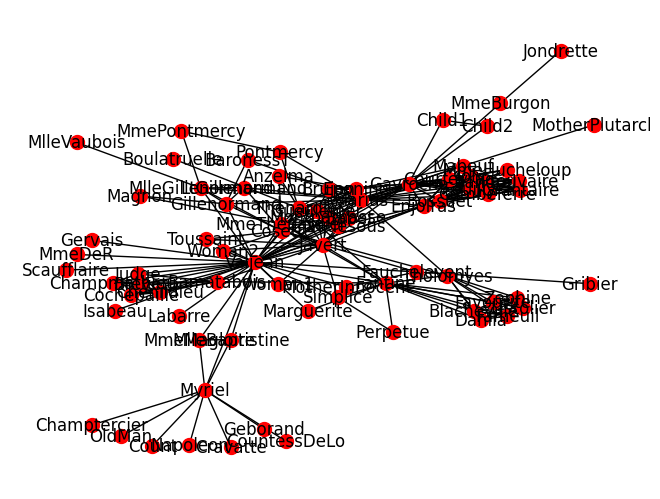

In [1]:
import networkx as nx

g = nx.read_gml("../data/lesmis.gml")

nx.draw_spring(g, node_size=100, node_color="red", with_labels=True)


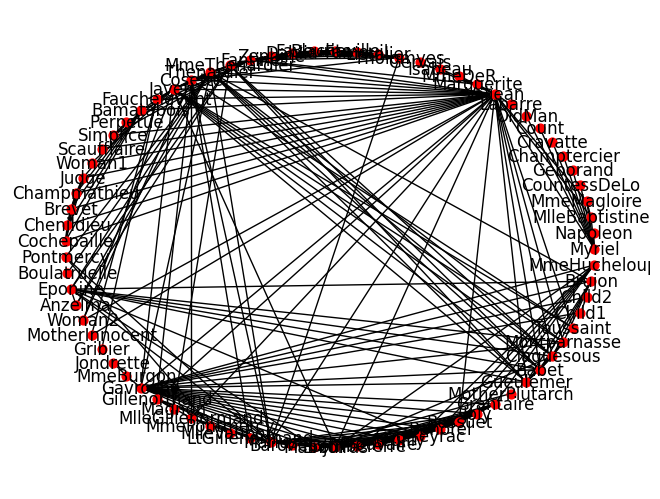

In [2]:
import matplotlib.pyplot as plt

# plt.subplot(231)
nx.draw_circular(g, node_size=40, node_color="red", with_labels=True)


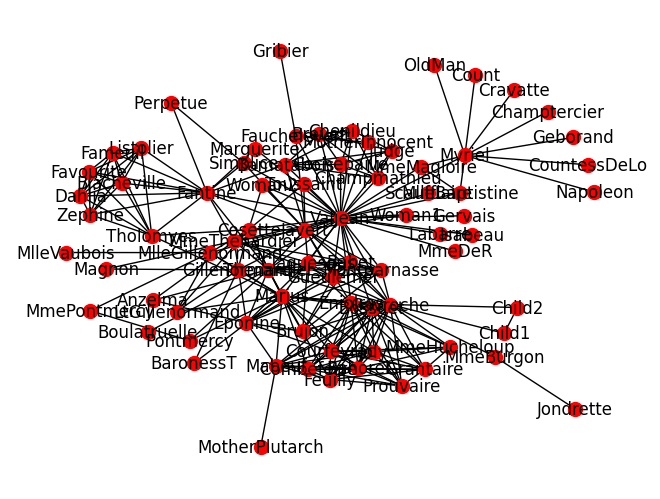

In [3]:
nx.draw_kamada_kawai(g, node_size=100, node_color="red", with_labels=True)


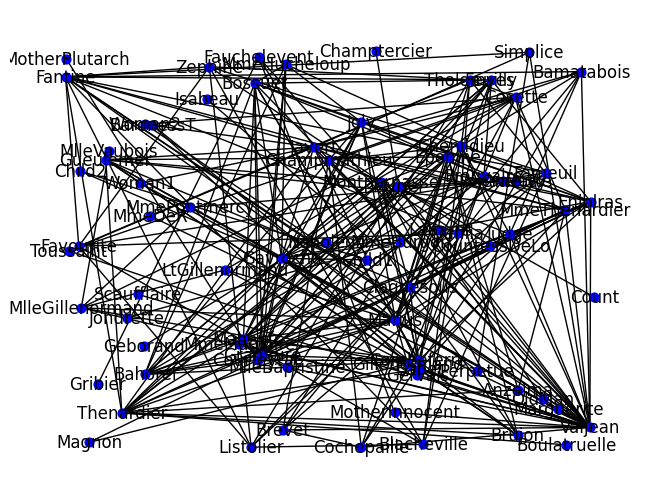

In [4]:
nx.draw_random(g, node_size=40, node_color="blue", with_labels=True)


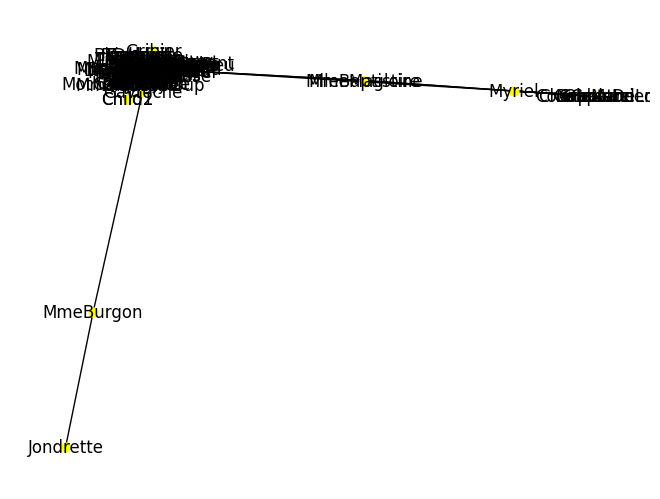

In [5]:
nx.draw_spectral(g, node_size=40, node_color="yellow", with_labels=True)


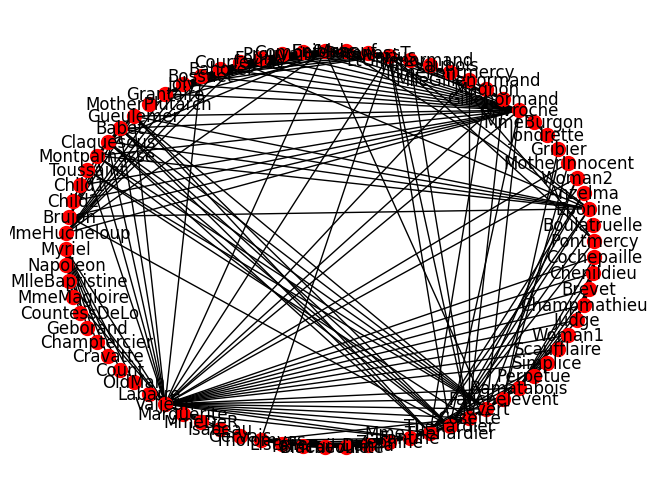

In [6]:
nx.draw_shell(g, node_size=100, node_color="red", with_labels=True)


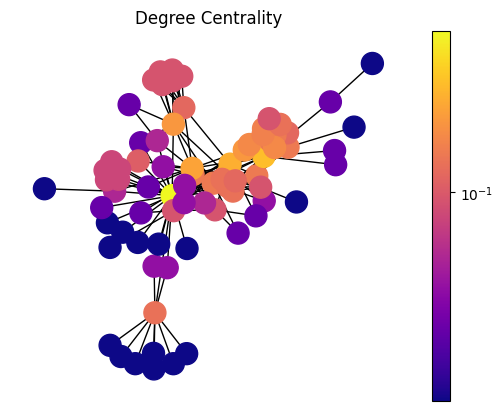

In [7]:
import matplotlib.colors as mcolors


def draw_h(g, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(
        g,
        pos,
        node_size=250,
        cmap=plt.cm.plasma,
        node_color=list(measures.values()),
        nodelist=list(measures.keys()),
    )
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(g, pos)
    edges = nx.draw_networkx_edges(g, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis("off")
    plt.show()


import numpy as np
import numpy.linalg as LA

from pprint import pprint

pos = nx.spring_layout(g)

draw_h(g, pos, nx.degree_centrality(g), "Degree Centrality")


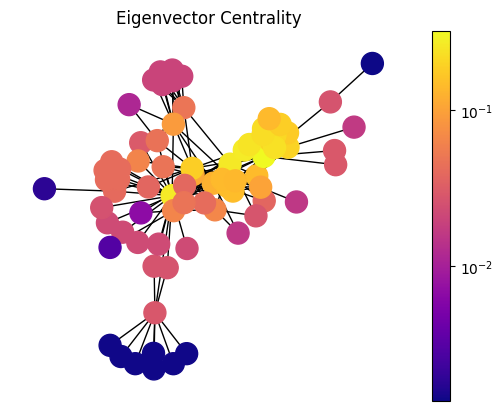

In [8]:
draw_h(g, pos, nx.eigenvector_centrality(g), "Eigenvector Centrality")


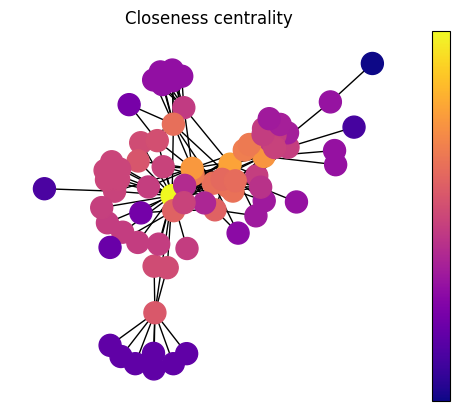

In [9]:
draw_h(g, pos, nx.closeness_centrality(g), "Closeness centrality")


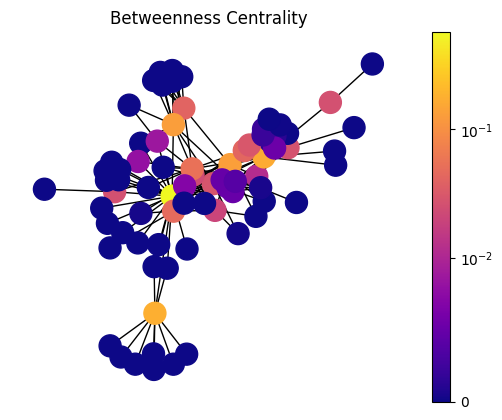

In [10]:
draw_h(g, pos, nx.betweenness_centrality(g), "Betweenness Centrality")


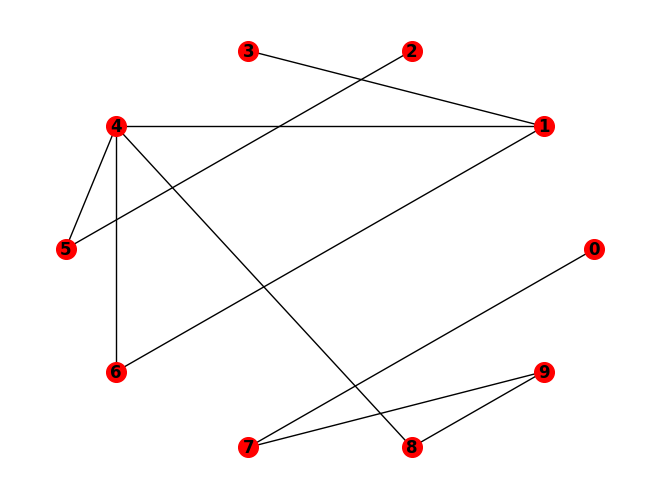

In [11]:
rnd = nx.gnp_random_graph(10, 0.3)

nx.draw_circular(
    rnd, node_size=200, node_color="red", with_labels=True, font_weight="bold"
)


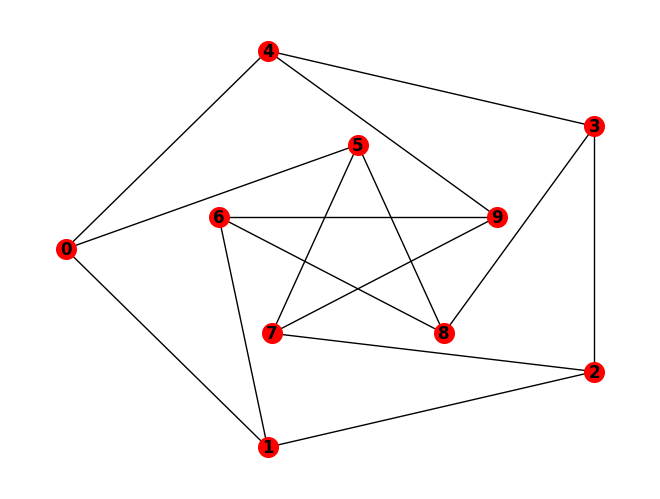

In [12]:
petersen = nx.petersen_graph()
nx.draw_shell(
    petersen,
    nlist=[range(5, 10), range(5)],
    node_size=200,
    node_color="red",
    with_labels=True,
    font_weight="bold",
)


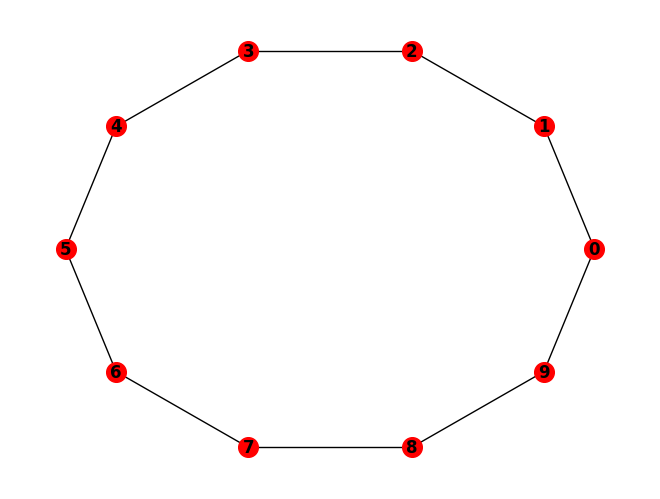

In [13]:
cycle = nx.cycle_graph(10)
nx.draw_circular(
    cycle,
    node_size=200,
    node_color="red",
    with_labels=True,
    font_weight="bold",
)


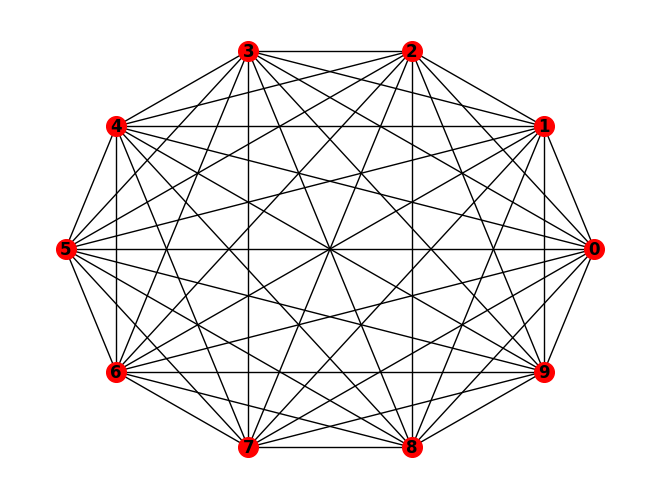

In [14]:
K_10 = nx.complete_graph(10)
nx.draw_circular(
    K_10, node_size=200, node_color="red", with_labels=True, font_weight="bold"
)


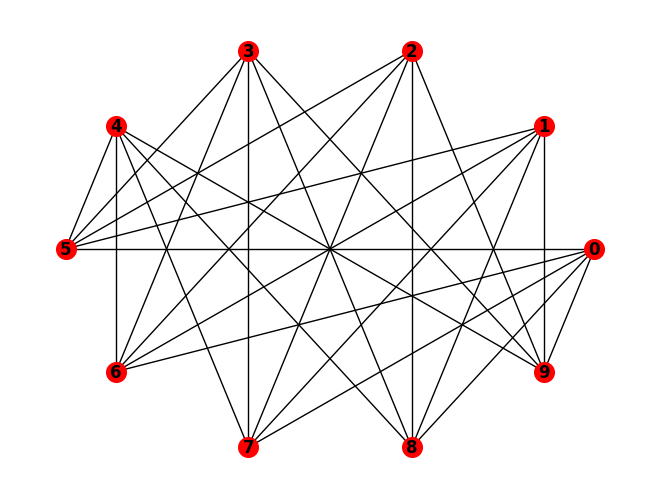

In [15]:
K_5_5 = nx.complete_bipartite_graph(5, 5)

nx.draw_circular(
    K_5_5,
    node_size=200,
    node_color="red",
    with_labels=True,
    font_weight="bold",
)


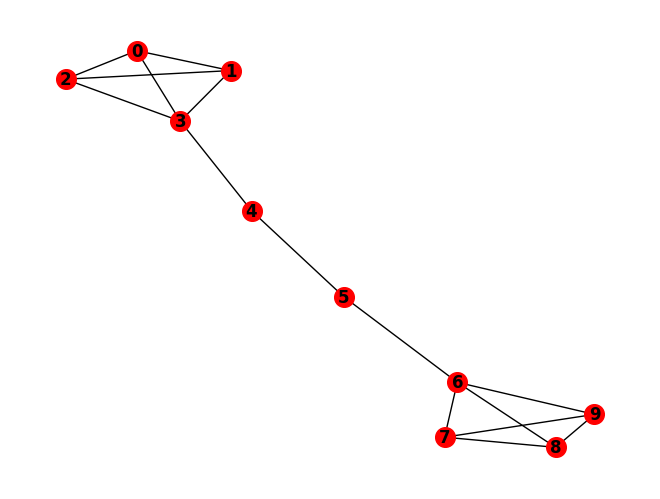

In [16]:
barbell = nx.barbell_graph(4, 2)

nx.draw_spring(
    barbell,
    node_size=200,
    node_color="red",
    with_labels=True,
    font_weight="bold",
)


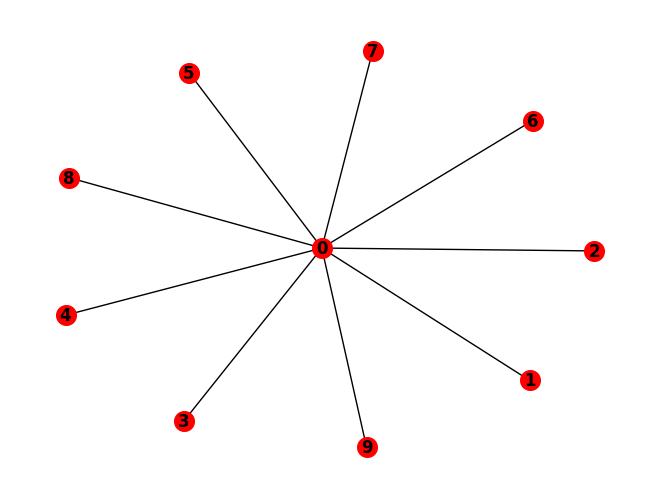

In [17]:
star = nx.star_graph(9)

nx.draw(
    star, node_size=200, node_color="red", with_labels=True, font_weight="bold"
)


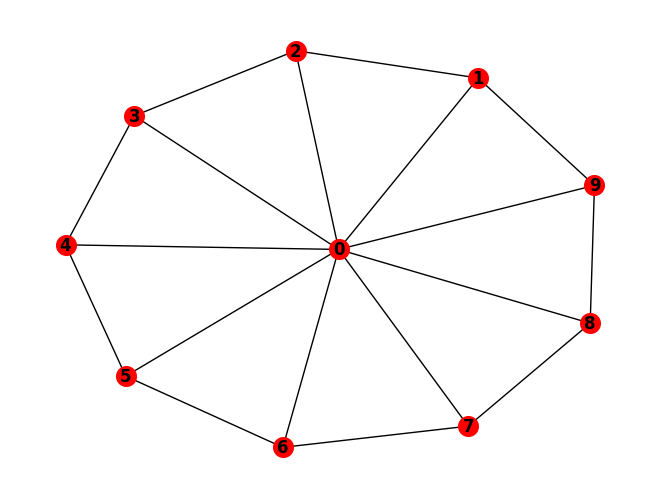

In [18]:
wheel = nx.wheel_graph(10)

nx.draw(
    wheel,
    node_size=200,
    node_color="red",
    with_labels=True,
    font_weight="bold",
)


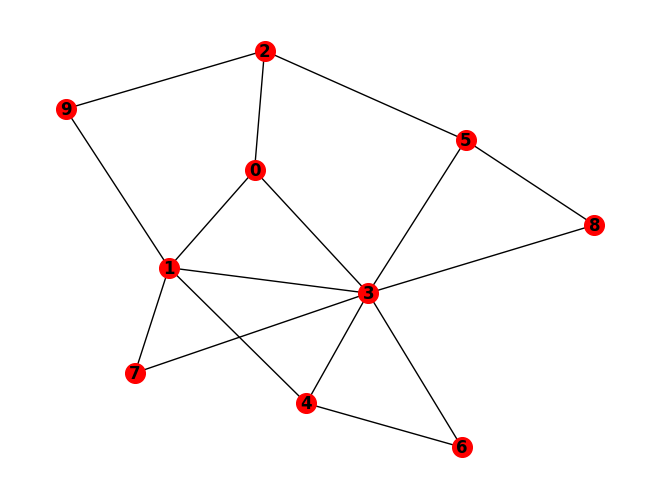

In [19]:
ba = nx.barabasi_albert_graph(10, 2)

nx.draw_spring(
    ba, node_size=200, node_color="red", with_labels=True, font_weight="bold"
)


In [20]:
def draw_m(G, pos):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200)
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(
        [
            "density: {:.5}".format(nx.density(G)),
            "clustering coefficient: {:.5}".format(nx.average_clustering(G)),
        ]
    )
    plt.axis("off")
    plt.show()


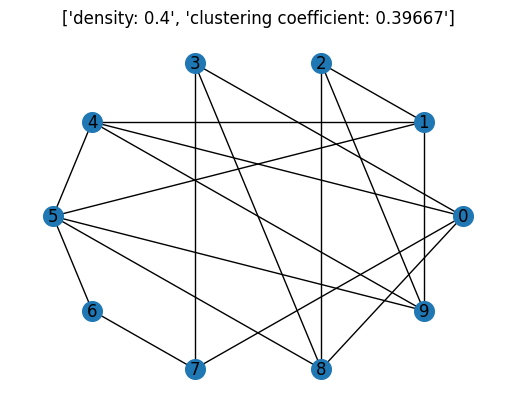

In [21]:
rng = nx.gnp_random_graph(10, 0.3)
pos = nx.circular_layout(rnd)
draw_m(rng, pos)


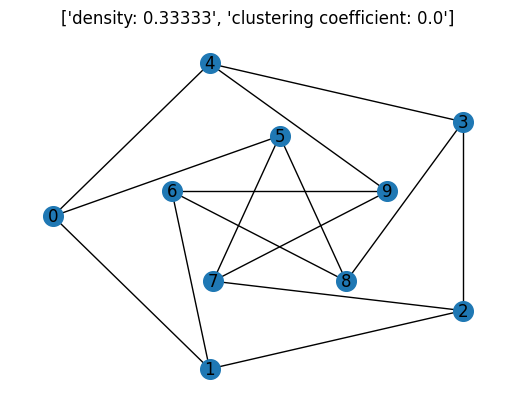

In [22]:
petersen = nx.petersen_graph()
pos = nx.shell_layout(petersen, nlist=[range(5, 10), range(5)])
draw_m(petersen, pos)


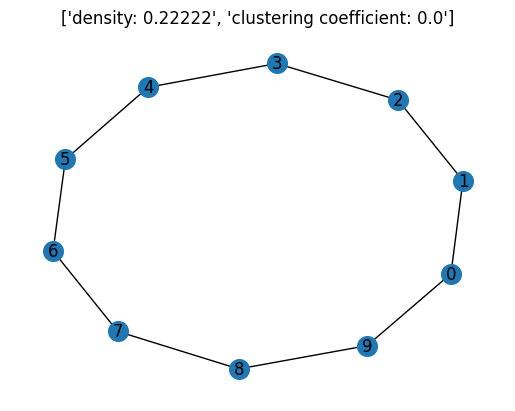

In [23]:
cycle = nx.cycle_graph(10)
pos = nx.spring_layout(cycle)
draw_m(cycle, pos)


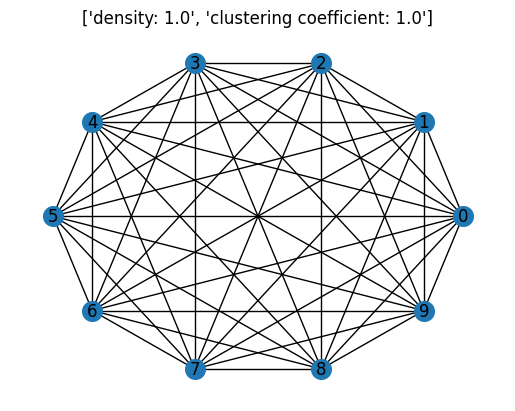

In [24]:
K_10 = nx.complete_graph(10)
pos = nx.circular_layout(K_10)
draw_m(K_10, pos=pos)


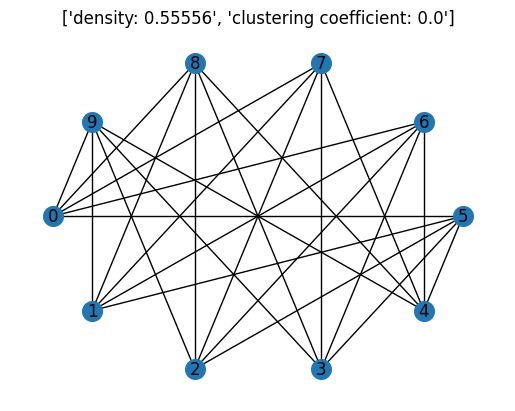

In [25]:
K_5_5 = nx.complete_bipartite_graph(5, 5)
pos = nx.shell_layout(K_5_5)
draw_m(K_5_5, pos=pos)


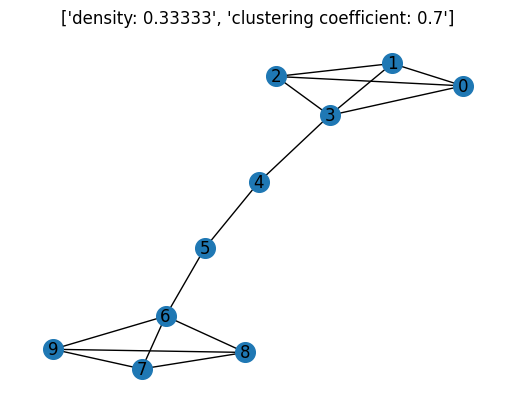

In [26]:
barbell = nx.barbell_graph(4, 2)
pos = nx.spring_layout(barbell)
draw_m(barbell, pos)


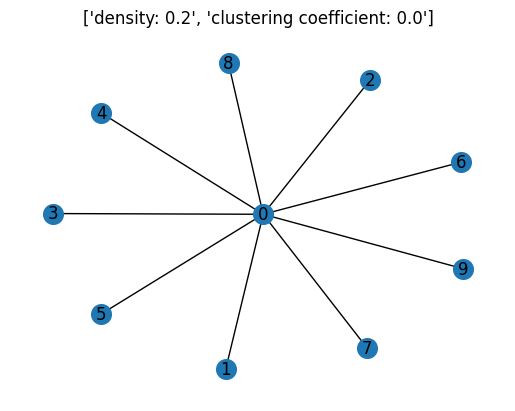

In [27]:
star = nx.star_graph(9)
pos = nx.spring_layout(star)
draw_m(star, pos)


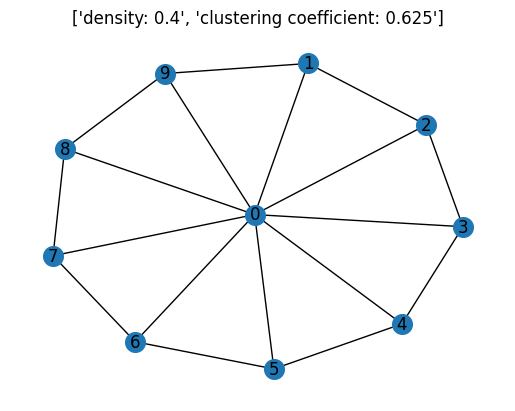

In [28]:
wheel = nx.wheel_graph(10)
pos = nx.spring_layout(wheel)
draw_m(wheel, pos)


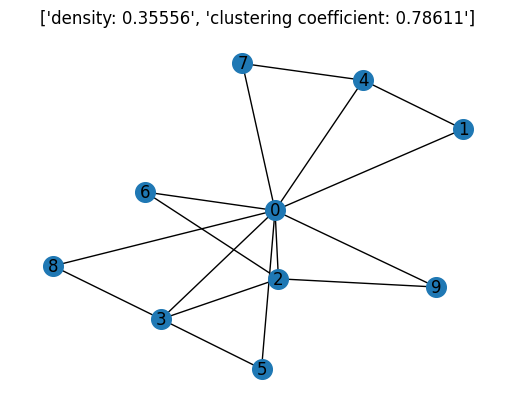

In [29]:
ba = nx.barabasi_albert_graph(10, 2)
pos = nx.spring_layout(ba)
draw_m(ba, pos)


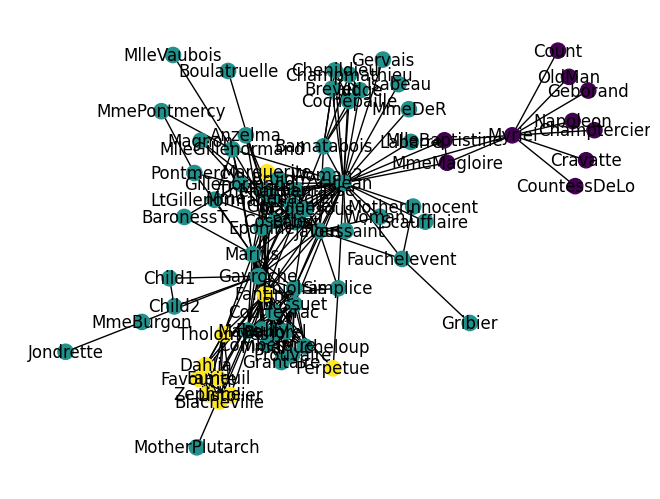

In [30]:
import pandas as pd
from networkx import community

carac = pd.DataFrame({"ID": g.nodes(), "myvalue": [0] * len(g.nodes())})
communities_generator = community.centrality.girvan_newman(g)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
    for n in next_level_communities[m]:
        carac.loc[carac.ID == n, "myvalue"] = m
nx.draw_spring(g, node_color=carac["myvalue"], node_size=120, with_labels=True)


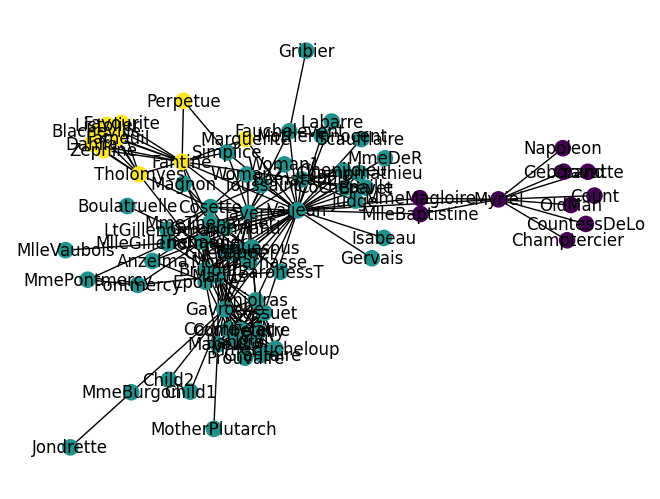

In [31]:
import pandas as pd
from networkx import community

carac = pd.DataFrame({"ID": g.nodes(), "myvalue": [0] * len(g.nodes())})
communities_generator = community.centrality.girvan_newman(g)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
for m in range(len(next_level_communities)):
    for n in next_level_communities[m]:
        carac.loc[carac.ID == n, "myvalue"] = m
nx.draw_spring(g, node_color=carac["myvalue"], node_size=120, with_labels=True)

save = "community.png"
plt.savefig(save)


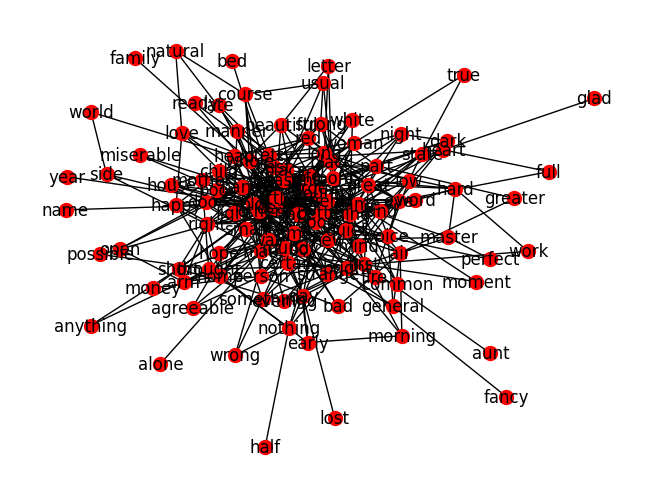

In [32]:
graph = nx.read_gml("../data/adjnoun.gml")
nx.draw_spring(graph, node_size=100, node_color="red", with_labels=True)


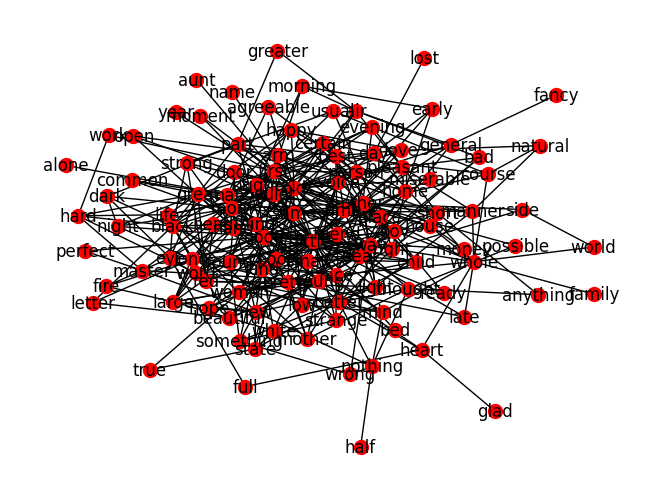

In [33]:
nx.draw_kamada_kawai(graph, node_size=100, node_color="red", with_labels=True)


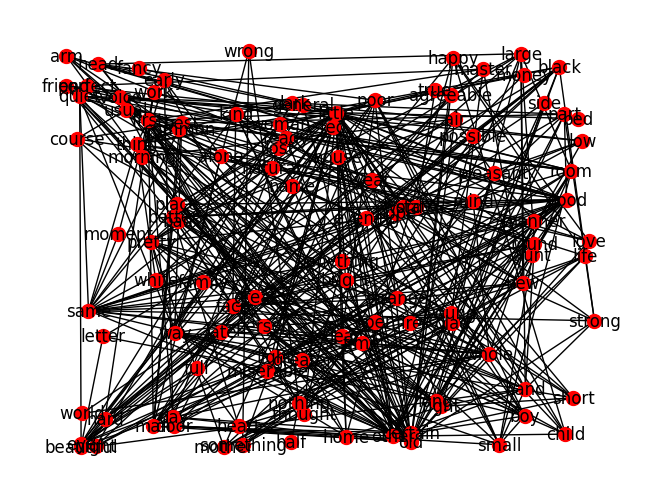

In [34]:
nx.draw_random(graph, node_size=100, node_color="red", with_labels=True)


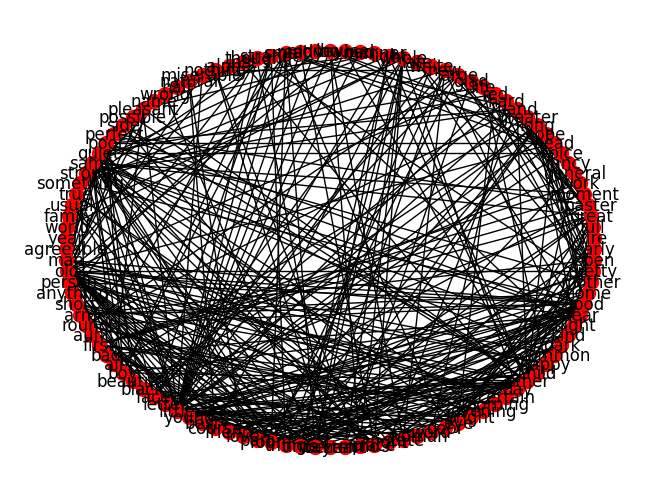

In [35]:
nx.draw_shell(graph, node_size=100, node_color="red", with_labels=True)


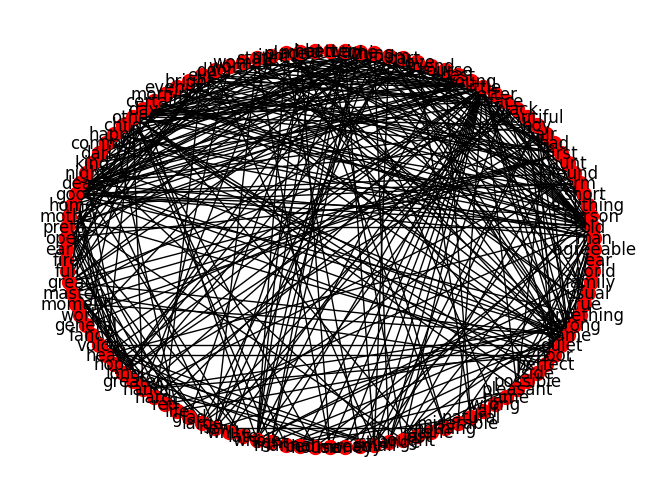

In [36]:
nx.draw_circular(graph, node_size=100, node_color="red", with_labels=True)


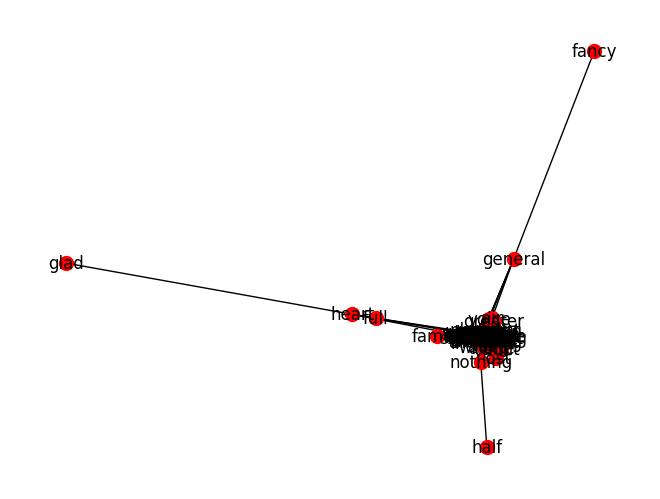

In [37]:
nx.draw_spectral(graph, node_size=100, node_color="red", with_labels=True)


In [38]:
import matplotlib.colors as mcolors


def draw_h(g, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(
        g,
        pos,
        node_size=250,
        cmap=plt.cm.plasma,
        node_color=list(measures.values()),
        nodelist=list(measures.keys()),
    )
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # labels = nx.draw_networkx_labels(g, pos)
    edges = nx.draw_networkx_edges(g, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis("off")
    plt.show()


import numpy as np
import numpy.linalg as LA

from pprint import pprint

pos = nx.spring_layout(graph)


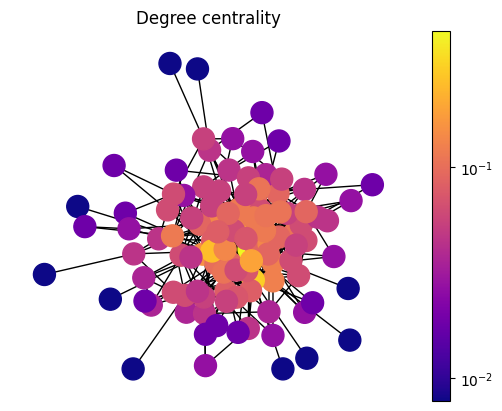

In [39]:
draw_h(graph, pos, nx.degree_centrality(graph), "Degree centrality")


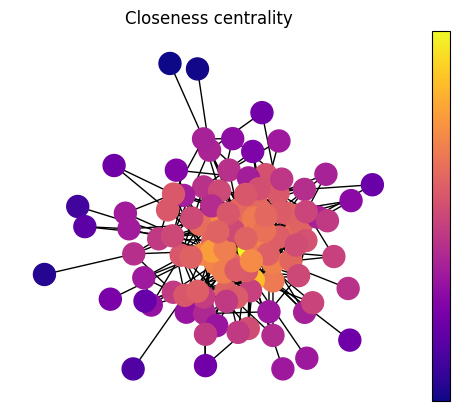

In [40]:
draw_h(graph, pos, nx.closeness_centrality(graph), "Closeness centrality")


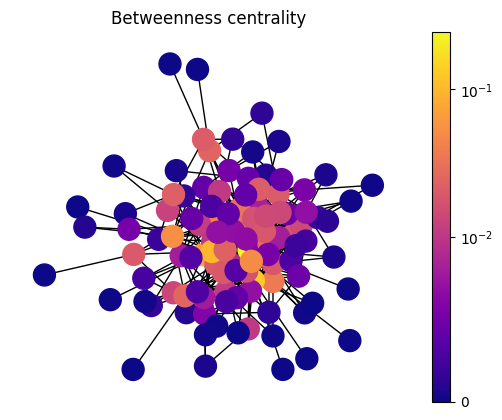

In [41]:
draw_h(graph, pos, nx.betweenness_centrality(graph), "Betweenness centrality")


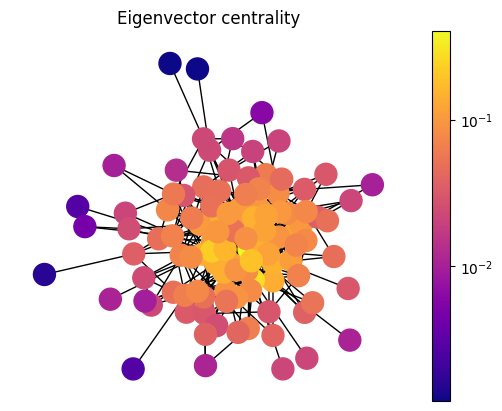

In [42]:
draw_h(graph, pos, nx.eigenvector_centrality(graph), "Eigenvector centrality")


In [43]:
def draw_m(G, pos):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200)
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(
        [
            "density: {:.5}".format(nx.density(G)),
            "clustering coefficient: {:.5}".format(nx.average_clustering(G)),
        ]
    )
    plt.axis("off")
    plt.show()
